# Genrating Images
In this notebook, we will use a trained GAN to generate an experimental image from simulated data.

In [1]:
import tensorflow as tf
from models import unet_generator
from generate_image import generate_image, GAN_image_folder
import os, shutil

In [2]:
generator_exp = unet_generator(1, 1, "instancenorm")
generator_sim = unet_generator(1, 1, "instancenorm")

2022-06-10 10:27:43.423550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /sw/spack/delta-2022-03/apps/cuda/11.6.1-gcc-11.2.0-vglutoe/lib64:/sw/spack/delta-2022-03/apps/anaconda3/2021.05-gcc-11.2.0-ievmolz/lib:/sw/spack/delta-2022-03/apps/openmpi/4.1.2-gcc-11.2.0-37px7gc/lib:/sw/spack/delta-2022-03/apps/ucx/1.11.2-gcc-11.2.0-pymppfm/lib:/sw/spack/delta-2022-03/apps/gcc/11.2.0-gcc-8.4.1-fxgnsyr/lib64:/sw/spack/delta-2022-03/apps/gcc/11.2.0-gcc-8.4.1-fxgnsyr/lib
2022-06-10 10:27:43.423581: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping re

In [3]:
parent_dir = "/u/skhan/stem-learning/"
sim_dir = parent_dir + "data/WSe/data_for_gan/simulation/sim_pristine_0.1_noised_normalized/"
exp_dir = parent_dir + "data/WSe/data_for_gan/experiment/real_107_raw_normalized/"

sim_input_file = sim_dir + "sim_images_stack0000_000_000.tiff"
exp_input_file = exp_dir + "107_RR_1750_000.tiff"

#identifier = "20220609_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_{}_{}".format(mat, num)
identifier = "20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_107"
fine_size, stride = 256, 256
num_channels=1
avg=False
plot=True
save_data=True
save_dir1=parent_dir




fname='generated_exp_stem.tiff'

save_dir = parent_dir + "data/WSe/data_for_gan/generated/GANNED_SIM/sim_abberation_{}/".format(identifier)

input_dir = sim_dir

########################################################################################################################
data_folder_with_labels = parent_dir + "data/WSe/data_for_gan/simulation/data_folders_with_labels/"
input_folder = save_dir
target_folder = parent_dir + "data/WSe/data_for_gan/generated/GANNED_DATA_FOLDER/data_folder_{}".format(identifier)

In [4]:
checkpoint_path = parent_dir + "cycle_gan_results/checkpoints/checkpoint_{}".format(identifier)
log_data_fn = "{}/data_{}.p".format(checkpoint_path, identifier)

ckpt = tf.train.Checkpoint(generator_exp=generator_exp,
                           generator_sim=generator_sim)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    #cpath = ckpt_manager.checkpoints[-2]
    cpath = ckpt_manager.latest_checkpoint
    print("loading checkpoint ", cpath)
    ckpt.restore(cpath)
    print ('Latest checkpoint restored!')

loading checkpoint  /u/skhan/stem-learning/cycle_gan_results/checkpoints/checkpoint_20220606_MODEL_unet_dist_gen_fft_10_SIM_pristine_gaussian_0.1_EXP_107/ckpt-59
Latest checkpoint restored!


processing data
loading model
stride: 256
predicting data
stitching data


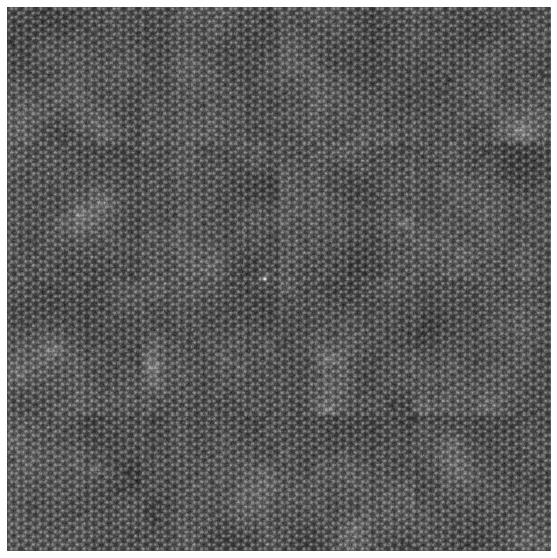

saving data


In [5]:
model = generator_exp
input_file = sim_input_file
fname = "generated_exp.tiff"
img = generate_image(model, input_file, fine_size, stride, avg, plot, save_data, save_dir1, fname)

processing data
loading model
stride: 256
predicting data
stitching data


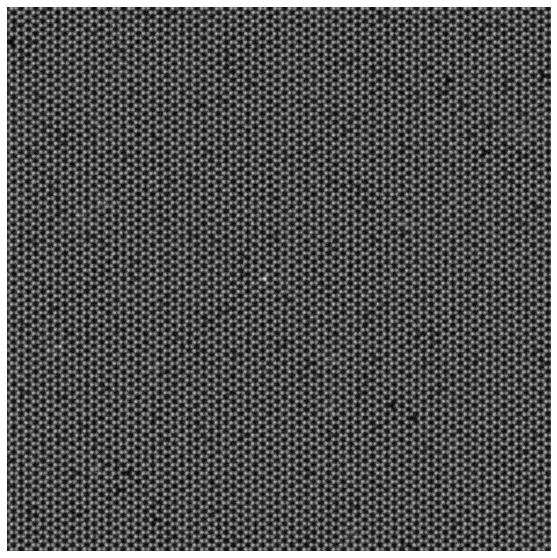

saving data


In [6]:
model = generator_sim
input_file = save_dir1 + "generated_exp.tiff"
fname = "cycled_sim.tiff"
img = generate_image(model, input_file, fine_size, stride, avg, plot, save_data, save_dir1, fname)

If we want to make batch images:

processing data
loading model
stride: 256
predicting data
stitching data


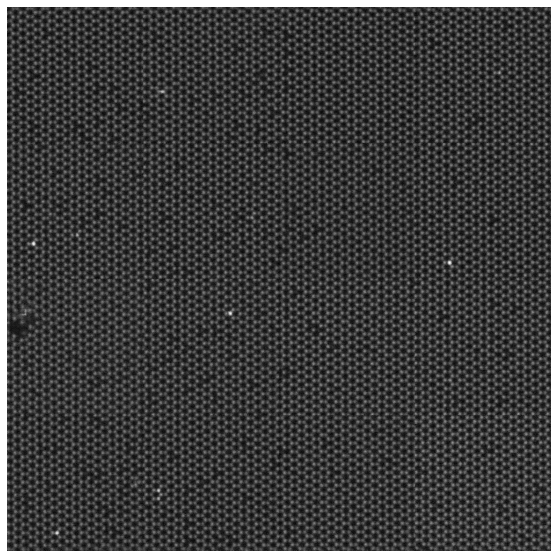

saving data


In [7]:
model = generator_sim
input_file = exp_input_file
fname = "generated_sim.tiff"
img = generate_image(model, input_file, fine_size, stride, avg, plot, save_data, save_dir1, fname)

processing data
loading model
stride: 256
predicting data
stitching data


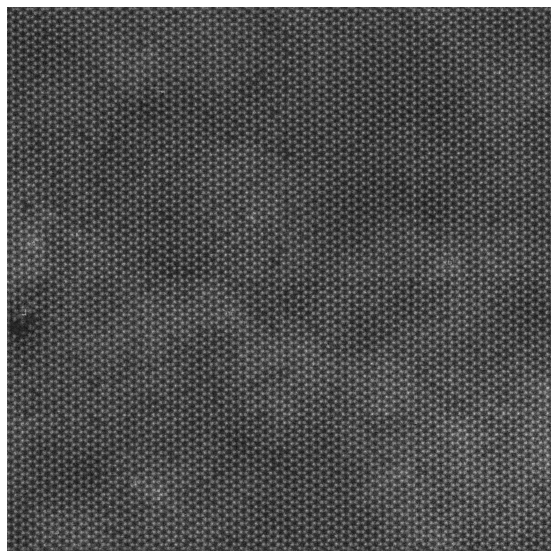

saving data


In [8]:
model = generator_exp
input_file = save_dir1 + "generated_sim.tiff"
fname = "cycled_exp.tiff"
img = generate_image(model, input_file, fine_size, stride, avg, plot, save_data, save_dir1, fname)